In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.stats.weightstats import ztest
from scipy.stats import probplot
import scipy.stats as stats

<span style="font-size: 16px; font-weight: bold;">
1. The relationship between the total purchase amount and the number of visits (stored in the variable visits) has been analyzed by calculating the Pearson correlation coefficient. Results were displayed, conclusions analyzed, and a scatter plot was created to determine whether adjustments are necessary for a more accurate assessment of the correlation.</span>

In [14]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [44]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [46]:
np.corrcoef(sum_purchases, visits)

array([[ 1.        , -0.30265845],
       [-0.30265845,  1.        ]])

In [76]:
std_x_general = np.std(sum_purchases, ddof=1)

<span style="color: #388E3C; font-size: 16px; font-weight: bold;">The value of 1 in the diagonal elements indicates that the variables are perfectly correlated with themselves. The value of -0.30265845 represents the Pearson correlation coefficient between the total purchase amount and the number of visits. This value indicates a weak negative correlation. A decrease in the number of visits may be accompanied by an increase in the total purchase amount, but the relationship between these two variables is weak (approximately -0.3).</span>

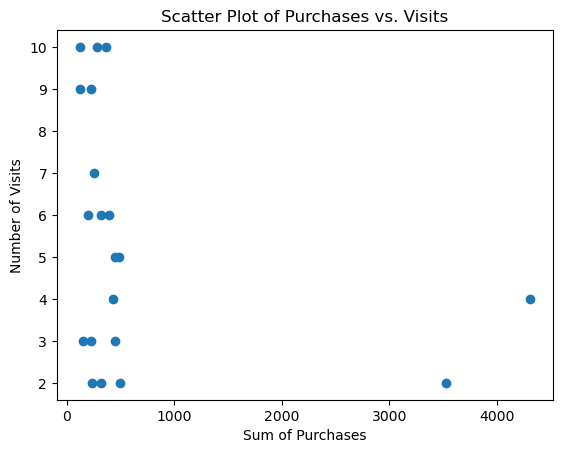

In [54]:
plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

<span style="color: #388E3C; font-size: 16px; font-weight: bold;">The scatter plot shows that most points align along a clear line, indicating a potential linear relationship between the total purchase amount and the number of visits, suggesting the presence of correlation. However, there are outliers—two distinct points—that may significantly affect the calculation of the correlation coefficient. These outliers could distort the evaluation and provide a misleading perception of the relationship between the variables. Removing the outliers might yield more accurate results.</span>

<span style="font-size: 16px; font-weight: bold;">
2. In the previous task, we observed that outliers interfere with obtaining a “true” correlation value. Let’s remove the records corresponding to the outliers in the total purchase amount and calculate the Pearson correlation coefficient again.</span>

In [78]:
threshold = mean_sum_p + 2 * std_x_general
filtered_sum_purchases = []
filtered_visits = []

for i in range(len(sum_purchases)):
    if sum_purchases[i] <= threshold:
        filtered_sum_purchases.append(sum_purchases[i])
        filtered_visits.append(visits[i])

correlation_coefficient = np.corrcoef(filtered_sum_purchases, filtered_visits)
correlation_coefficient

array([[ 1.        , -0.36852121],
       [-0.36852121,  1.        ]])

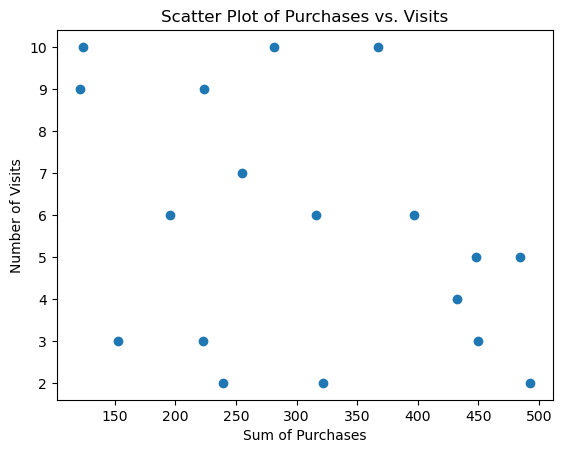

In [81]:
plt.scatter(filtered_sum_purchases, filtered_visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

<span style="color: #388E3C; font-size: 16px; font-weight: bold;">The Pearson correlation coefficient of -0.3685 indicates a negative correlation between the two variables. However, the correlation is not very strong, as the value is not close to -1 or 1. This suggests that the relationship between these two variables is weak. The weak negative correlation between the number of visits and the total purchase amount may imply that customers with fewer visits tend to spend more, or other factors might be influencing this relationship.</span>

<span style="font-size: 16px; font-weight: bold;">
3.	The data represents the total purchases in dollars made by our customers on the website during July 2022. Before this month, our average check was $20. Did we manage to statistically significantly increase the average check during the last month?</span>	

In [94]:
df = pd.read_csv('../Data/data_statistics/data.csv')
data = np.array(df['data'])

In [99]:
previous_mean = 20
alpha = 0.05
ztest_Score, p_value = ztest(data, value = previous_mean, alternative='larger')

ztest_Score, p_value

(-0.9953477389335053, 0.8402164165464012)

In [102]:
if p_value < alpha:
    print("The null hypothesis is rejected (the average check has increased).")
else:
    print("There is no reason to reject the null hypothesis (the average check has not increased).")

There is no reason to reject the null hypothesis (the average check has not increased).


<span style="color: #388E3C; font-size: 16px; font-weight: bold;">Since the p-value of 0.8402 is greater than 0.05, we do not have sufficient evidence to reject the null hypothesis.This indicates that there is no statistically significant difference in the average check between the new data and the previous average value of $20. Based on this data, it can be concluded that achieving a substantial increase in the average check was not successful.</span>

<span style="font-size: 16px; font-weight: bold;"> 4. Time has passed, and we have collected sales data for August 2022, stored in the file data_2.csv. Sales were somewhat higher, but has the average check changed statistically significantly compared to July 2022? Let’s test this using a z-test.</span>	

In [118]:
df_august = pd.read_csv('../Data/data_statistics/data_2.csv')
data_august = np.array(df_august['data'])

In [121]:
np.mean(data), np.mean(data_august)

(19.37755319670441, 19.37322276512519)

In [124]:
ztest(data, data_august, alternative='two-sided')

(0.005246673456808504, 0.9958137794593356)

<span style="color: #388E3C; font-size: 16px; font-weight: bold;">Since the p-value of 0.9958 is significantly greater than 0.05, we cannot reject the null hypothesis. There is no statistically significant difference in the average check values between July and August 2022.</span>

<span style="font-size: 16px; font-weight: bold;"> 5. Let’s look at the distribution of our data and overlay it with a linear density plot.</span>	

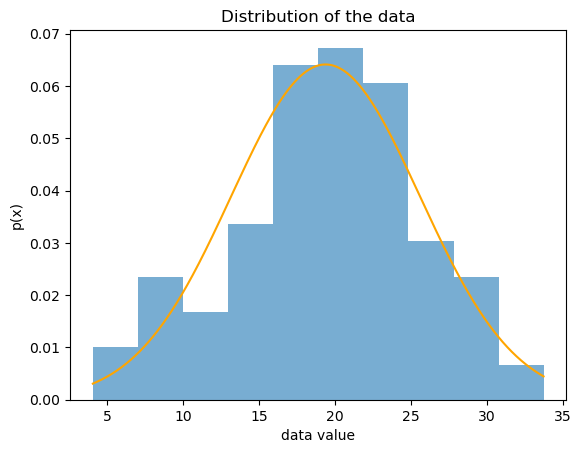

In [144]:
x_axis = np.arange(data.min(), data.max(), 0.01)

mean = np.mean(data)
std_dev = np.std(data)

plt.hist(data, bins=10, density=True, alpha=0.6)
pdf = stats.norm.pdf(x_axis, mean, std_dev)
plt.plot(x_axis, pdf, 'orange')

plt.title('Distribution of the data')
plt.xlabel('data value')
plt.ylabel('p(x)');

<span style="color: #388E3C; font-size: 16px; font-weight: bold;">The graph shows that the shape of the data histogram closely matches the theoretical normal distribution. The histogram exhibits the characteristic symmetric “bell-shaped” form of a normal distribution. The data appears to be approximately normally distributed.</span>

<span style="font-size: 16px; font-weight: bold;"> 6. Build a QQ-Plot to compare our data with the normal distribution.</span>	

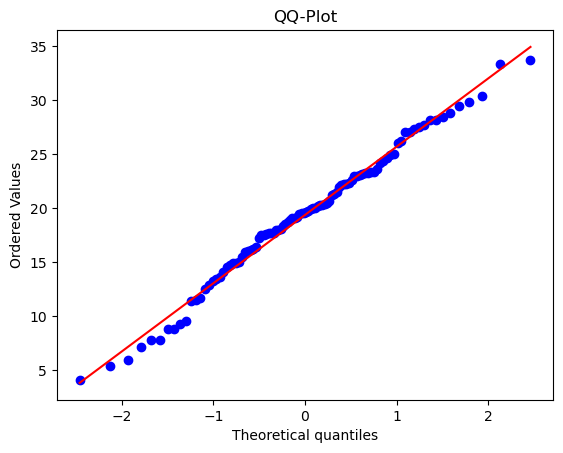

In [154]:
probplot(data, dist="norm", plot=plt)
plt.title("QQ-Plot")
plt.show()

<span style="color: #388E3C; font-size: 16px; font-weight: bold;">The points on the graph lie approximately on a straight line, indicating that your data set follows the assumed distribution.</span>

<span style="font-size: 16px; font-weight: bold;"> 7. Shapiro-Wilk Test</span>

The Shapiro-Wilk test evaluates how likely it is that a given sample was drawn from a normal distribution. The null hypothesis (H₀) of the Shapiro-Wilk test states that the random variable, represented by the given sample, follows a normal distribution. The alternative hypothesis (H₁) states that the distribution is not normal.

In [162]:
from scipy.stats import shapiro

In [165]:
stat, p_value_shapiro = shapiro(data)
print("Shapiro-Wilk Test:")
print("Test Statistic:", stat)
print("P-value:", p_value_shapiro)

if p_value_shapiro > 0.05:
    print("\nBased on the Shapiro-Wilk test, the data follows a normal distribution (fail to reject H0).")
else:
    print("\nBased on the Shapiro-Wilk test, the data does not follow a normal distribution (reject H0).")

Shapiro-Wilk Test:
Test Statistic: 0.9887855685963715
P-value: 0.5677973106978921

Based on the Shapiro-Wilk test, the data follows a normal distribution (fail to reject H0).
